### 决策树的运行逻辑
  - 计算出标签的不纯度
  - 按照某个标签划分，如果某个标签让不纯度下降最快。就在根节点使用某个标签划分。
  - 每一个叶子节点都是一个标签
  - 0.625 表示整体标签的不纯度。按照first 划分后，左边2个，右边两个。计算加权不纯度，左边标签的不纯度为。1-(0+0.5**2+0.5**2)=0.5 , 右边：1-(1**2+0+0)=0 。
  - 加权后为0.5*1/2+0*1/2=0.25。此时下降最快如果使用其他标签，均大于此值。如果按照 second 划分，左边：1-(2/3**2+0+1/3**2)=4/9 右边 0， 加权后 4/9 * 3/4 + 0 = 0.3333...

Feature names (vocabulary):
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

Term Frequency Matrix:
   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         1      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1


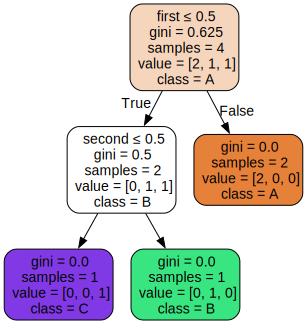

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import ExtraTreesClassifier
import graphviz
from sklearn.feature_extraction.text import TfidfVectorizer
# 定义一些示例文本数据
texts = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]
labels = ["A","B","C","A"]
# 创建 CountVectorizer 实例，默认参数
vectorizer = CountVectorizer(binary=True)

# 拟合并转换文本数据，得到词频矩阵
X = vectorizer.fit_transform(texts)
# 创建决策树分类器实例并拟合数据
clf = DecisionTreeClassifier(random_state=1234,max_depth=5)
model = clf.fit(X, labels)
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=vectorizer.get_feature_names_out(),  
                           class_names=labels,  
                           filled=True, rounded=True,  
                           special_characters=True)  
# 将结果转换为 DataFrame 以便于阅读
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("Feature names (vocabulary):")
print(vectorizer.get_feature_names_out())
print("\nTerm Frequency Matrix:")
print(df)

graphviz.Source(dot_data)

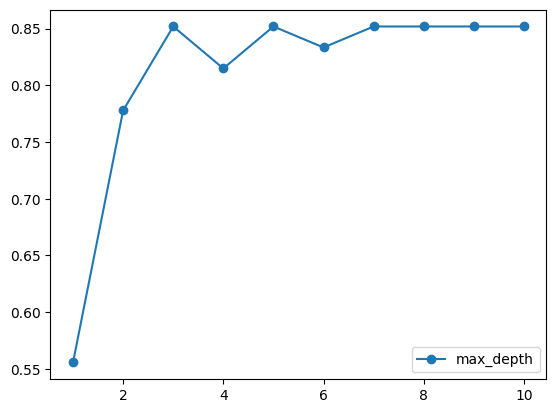

In [ ]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

wine = load_wine()

Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)
# random_state=42 使得每次运行结果相同,随机一部分特征计算最优解。
clf = DecisionTreeClassifier(criterion='gini'
                             ,random_state=42
                             ,splitter='random'
                             ,max_depth=3
                             # 分支的最少样本量
                             ,min_samples_split=10
                             # 叶子节点的最少样本量
                             ,min_samples_leaf=1
                             )
clf = clf.fit(Xtrain, ytrain)
score = clf.score(Xtest, ytest)
# 特征重要性展示
[*zip(wine.feature_names, clf.feature_importances_)]
# 超参数优化 max_depth
test = []
for i in range(10):
    clf = DecisionTreeClassifier(max_depth=i+1, random_state=42,splitter='random')
    clf.fit(Xtrain, ytrain)
    score = clf.score(Xtest, ytest)
    test.append(score)
# 可视化决策树 
plt.plot(range(1, 11), test, marker='o',label='max_depth')
plt.legend()
plt.show()
# class_weight & min_weight_fraction_leaf 调整标签的权重比值，让某些标签具有更高的权重。
# apply方法返回每个样本在每棵树中的叶子节点索引。
# predict方法返回每个样本的预测标签。
# predict_proba方法返回每个样本在每个类别上的概率。
# 决策数不擅长环形数据，最擅长月亮型的是knn,svm 和 高斯过程。环形数据是knn 和 高斯过程，对半分是朴素贝叶斯，神经网络和随机森林。


In [41]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

diabetes = load_diabetes()
regressor = DecisionTreeRegressor(random_state=42)
# 分类返回正确率，回归默认返回R^2分数
cross_val_score(regressor
                , diabetes.data
                , diabetes.target
                , cv=10
                , scoring='neg_mean_squared_error')

array([-8967.8       , -6110.68888889, -5264.29545455, -7146.77272727,
       -6508.59090909, -5787.65909091, -7020.68181818, -6949.77272727,
       -9052.97727273, -6787.79545455])

0.8166624106230849


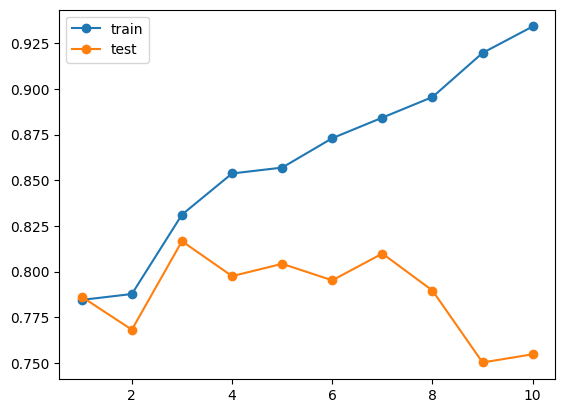

(np.float64(0.829621095750128),
 {'criterion': 'entropy',
  'max_depth': 6,
  'min_impurity_decrease': np.float64(0.0),
  'min_samples_leaf': 6,
  'splitter': 'random'})

In [31]:
# 泰坦尼克预测
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
data = pd.read_csv('train.csv')
# 删除无关的特征
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# 处理缺失值
data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data.dropna()
# 将性别转换为数值
data['Sex'] = data['Sex'].map({"male":1,"female":0})
data['Embarked'] = data['Embarked'].map({"S":0,"C":1,"Q":2})
x = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
for i in [Xtrain, Xtest, ytrain, ytest]:
    i.index = range(i.shape[0])
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(Xtrain, ytrain)
score = cross_val_score(clf,x,y,cv=10).mean()
tr = []
te = []
for i in range(1, 11):
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=i, random_state=42)
    clf.fit(Xtrain, ytrain)
    tr.append(clf.score(Xtrain, ytrain))
    te.append(cross_val_score(clf,x,y,cv=10).mean())
print(max(te))
plt.plot(range(1, 11), tr, marker='o',label='train')
plt.plot(range(1, 11), te, marker='o',label='test')
plt.legend()
plt.show()
import numpy as np
gini_threholds = np.linspace(0, 0.5, 20)
clf = DecisionTreeClassifier( random_state=42)
GS = GridSearchCV(clf, param_grid={"max_depth": [*range(1,10)]
                                   ,"criterion": ["gini", "entropy"]
                                   ,"splitter": ["best", "random"]
                                   ,"min_samples_leaf": [*range(1,50,5)]
                                   ,"min_impurity_decrease": [*gini_threholds]
                                   }, cv=10)
GS = GS.fit(Xtrain, ytrain)
GS.best_score_,GS.best_params_

0.9629629629629629 1.0


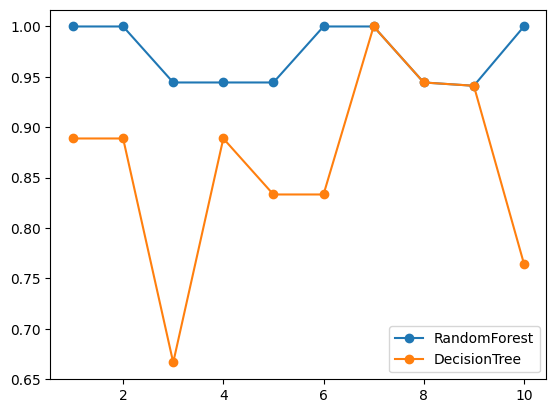

In [ ]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
wine = load_wine()
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
clf = clf.fit(Xtrain, ytrain)
rfc = rfc.fit(Xtrain, ytrain)
score_c = clf.score(Xtest, ytest)
score_r = rfc.score(Xtest, ytest)
print(score_c,score_r)

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25, random_state=42)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)
clf = DecisionTreeClassifier(random_state=42)
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)
plt.plot(range(1, 11), rfc_s, marker='o',label='RandomForest')
plt.plot(range(1, 11), clf_s, marker='o',label='DecisionTree')
plt.legend()
plt.show()
# 袋装模型，随机性，有放回抽样。如果n够大，有37%的样本不会被抽到。使用oob_score_=True来启用袋外数据进行分数评估。


In [12]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
# 填补缺失值
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
diabetes = load_diabetes()
X_full,y_full= diabetes.data,diabetes.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
rng = np.random.RandomState(42)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
# 随机选择缺失值的索引0-n_features 随机 n_missing_samples个
missing_features = rng.randint(0, n_features, n_missing_samples)
missing_samples = rng.randint(0, n_samples, n_missing_samples)
X_missing = X_full.copy()
y_missing = y_full.copy()
X_missing[missing_samples, missing_features] = np.nan
# numpy 在索引计算没有pd 好用
X_missing = pd.DataFrame(X_missing)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)  # 训练并导出
X_missing_mean = pd.DataFrame(X_missing_mean)
# X_missing_mean.info()
# 填补缺失值，使用存在的标签进行训练，对缺失值进行预测。从缺失值最少的开始。
X_missing_regressor = X_missing.copy()
# 也可以使用np.argsort()来获取索引
sort_index = X_missing.isnull().sum(axis=0).sort_values(ascending=True).index
sort_index

Index([3, 9, 5, 2, 7, 4, 1, 8, 6, 0], dtype='int64')